In [6]:
import matplotlib.pyplot as plt
from Spectral_Line_Shape import *
import os

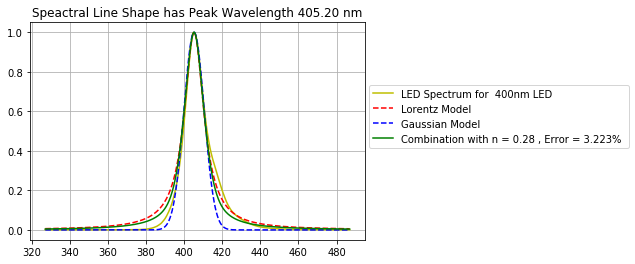

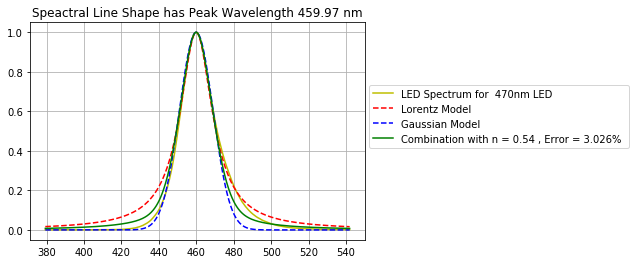

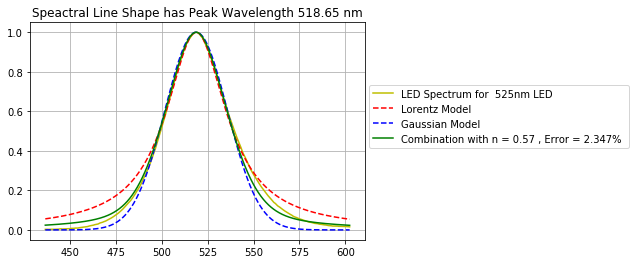

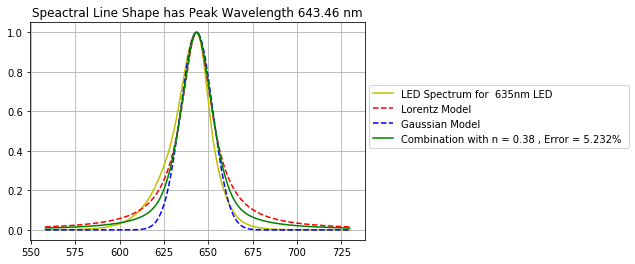

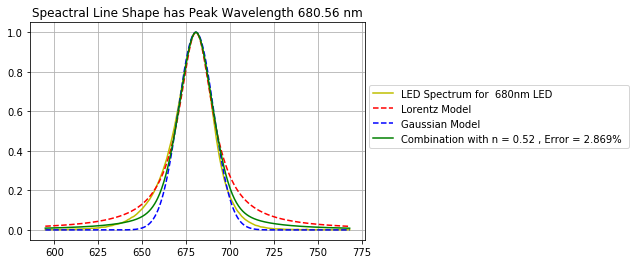

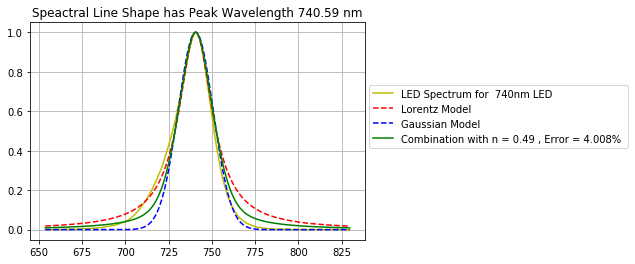

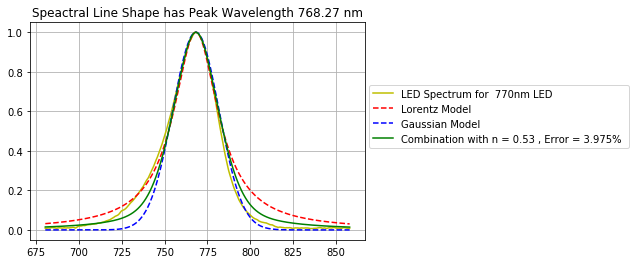

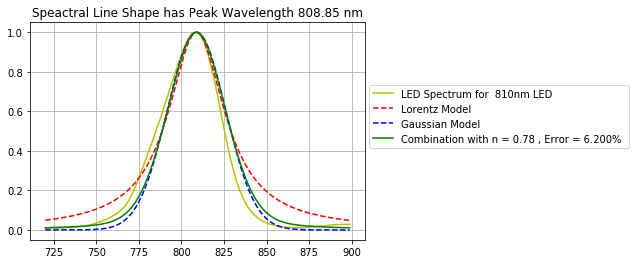

In [22]:
for filename in os.listdir() :
    if filename[-3:] == 'txt':
        intensity , x_axis = Textfile_read(filename)
        x_axis_cropped , intensity_cropped , peak = center_peak(x_axis , intensity)
        param , x = spectral_line_fit(x_axis_cropped , intensity_cropped , peak)
        RMSE = param[0]
        n = param[1]
        Voigt = n*Gaussian(x) + (1-n)*Lorentz(x)
        plt.figure()
        plt.plot(x_axis_cropped , intensity_cropped , 'y' , label = 'LED Spectrum for  %s LED'  % filename[:5])
        plt.plot(x_axis_cropped , Lorentz(x) , 'r--' , label = 'Lorentz Model')
        plt.plot(x_axis_cropped , Gaussian(x) , 'b--' , label = 'Gaussian Model')
        plt.plot(x_axis_cropped , Voigt , 'g' , label = 'Combination with n = %1.2f , Error = %1.3f%% ' % (n , RMSE*100))
        plt.grid()
        plt.title("Speactral Line Shape has Peak Wavelength %3.2f nm" % x_axis_cropped[peak])
        plt.legend(loc='lower center', bbox_to_anchor=(1.4, 0.4))